<H1>Modelo de Regresión Logística</H1>

La Regresión Logística es una técnica de machine learning utilizada para problemas de clasificación binaria o multicategoría. Es adecuada para este caso debido a las siguientes razones:

**Naturaleza del Problema:** La variable objetivo en este caso es la calidad del vino, que se clasifica en diferentes categorías. La Regresión Logística es ideal para problemas en los que queremos predecir la probabilidad de que una instancia pertenezca a una clase específica.

**Interpretabilidad:** La Regresión Logística es relativamente fácil de interpretar. Los coeficientes del modelo proporcionan información sobre cómo cada característica afecta la probabilidad de que una instancia pertenezca a una clase particular.

**Desempeño en Datos Pequeños:** La Regresión Logística puede ser muy eficaz en conjuntos de datos que no son demasiado grandes o complejos. En problemas con muchas características pero sin una gran cantidad de datos, la Regresión Logística puede ofrecer un buen balance entre rendimiento y simplicidad.

**Probabilidades y Clasificación:** La Regresión Logística no solo clasifica, sino que también estima probabilidades. Esto puede ser útil para entender no solo si una instancia pertenece a una clase, sino también con qué confianza el modelo hace esa predicción.

**Escalabilidad:** Es una técnica computacionalmente eficiente y puede manejar bien grandes conjuntos de datos.

**Regularización:** La Regresión Logística soporta la regularización, lo que ayuda a prevenir el sobreajuste al penalizar modelos complejos.

Baste de datos originial: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
import pandas as pd
import numpy as np

In [56]:
url='/home/julio/jupyter_files/MLM_RedWine/winequality-red.csv'
# Leer el archivo .csv desde la URL
df = pd.read_csv(url)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
# Calcular el número total de filas en el DataFrame
total_rows = len(df)
# Calcular el número de filas nulas por columna
null_counts = df.isnull().sum()
# Calcular el porcentaje de filas nulas por columna
null_percentage = (null_counts / total_rows) * 100
# Mostrar el resultado
print('Porcentaje de Filas Nulas')
print('----------------------------')
print(null_percentage)
print('----------------------------')

Porcentaje de Filas Nulas
----------------------------
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64
----------------------------


**1 Preparación del Entorno**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

**2 Preparar los Datos**

In [58]:
# Separar características y variable objetivo
X = df.drop('quality', axis=1)  # Características
y = df['quality']  # Variable objetivo

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Justificación:**

*Separación de datos:* Separamos las características (X) de la variable objetivo (y) para que el modelo pueda aprender a predecir la calidad del vino a partir de las características proporcionadas.

*División en conjuntos de entrenamiento y prueba:* Esta división permite entrenar el modelo en un subconjunto de los datos y evaluar su desempeño en un subconjunto separado. Esto ayuda a verificar que el modelo generaliza bien a datos no vistos.

**3 Escalar las Características**

**¿Por Qué Usar `StandardScaler` para la Estandarización?**

La estandarización es un paso crucial en el preprocesamiento de datos para muchos modelos de machine learning, incluida la Regresión Logística. El `StandardScaler` es una técnica de estandarización que transforma las características para que tengan una media de 0 y una desviación estándar de 1. Se calcula utilizando la siguiente fórmula:

$  X_{\text{escalado}} = \frac{X - \mu}{\sigma}  $

donde:
- $ X $ es el valor original de la característica.
- $ \mu $ es la media de la característica.
- $ \sigma $ es la desviación estándar de la característica.

**¿Por Qué Usar el `StandardScaler`?**

1. **Escalado de Características**: Los algoritmos de machine learning, como la Regresión Logística, funcionan mejor cuando las características están en la misma escala. Sin estandarización, características con escalas diferentes (por ejemplo, edad en años frente a ingresos en dólares) pueden influir desproporcionadamente en el modelo.

2. **Convergencia Más Rápida**: La estandarización ayuda a que el algoritmo de optimización (como el gradiente descendente) converge más rápidamente. Si las características están en diferentes escalas, el algoritmo puede tener que hacer más ajustes para encontrar el mínimo óptimo.

3. **Interpretabilidad y Consistencia**: Estandarizar las características facilita la interpretación de los coeficientes del modelo y garantiza que las características contribuyan de manera equitativa a la predicción.

4. **Eficiencia Computacional**: Modelos de machine learning que utilizan la distancia (como SVM o K-Means) se benefician del escalado porque el cálculo de distancias se realiza de manera más equitativa.

In [59]:
# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos de entrenamiento
X_train_scaled = scaler.fit_transform(X_train)

# Transformar los datos de prueba
X_test_scaled = scaler.transform(X_test)

**3.b Aplicar SMOTE para el Balanceo de Clases**

Los modelos de machine learning pueden tener dificultades para aprender patrones representativos de las clases minoritarias. Esto suele llevar a un rendimiento deficiente del modelo en términos de precisión y capacidad para predecir correctamente las clases menos representadas. Aquí es donde entra SMOTE (Synthetic Minority Over-sampling Technique) como una técnica de balanceo de clases efectiva.

SMOTE es una técnica de sobre-muestreo que genera nuevas instancias sintéticas para la clase minoritaria. A diferencia de simplemente duplicar las instancias existentes, SMOTE crea nuevas instancias interpolando entre ejemplos existentes. Este proceso ayuda a que el modelo aprenda de una representación más equilibrada de todas las clases.   

In [60]:
# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Ajustar y transformar los datos de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
# Mostrar el balance de clases después de SMOTE
print("Distribución de clases después de SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Distribución de clases después de SMOTE:
7    486
5    486
6    486
3    486
8    486
4    486
Name: quality, dtype: int64


**4 Entrenar el Modelo de Regresión Logística Inicial**

In [61]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

In [62]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [63]:
# Realizar predicciones
y_pred = model.predict(X_test_scaled)

In [64]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=0)

In [55]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.5645833333333333
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 146  49   0   0]
 [  0   0  73 109  18   0]
 [  0   0   4  41  16   0]
 [  0   0   0   2   4   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.26      0.32        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.26      0.26       480
weighted avg       0.53      0.56      0.54       480



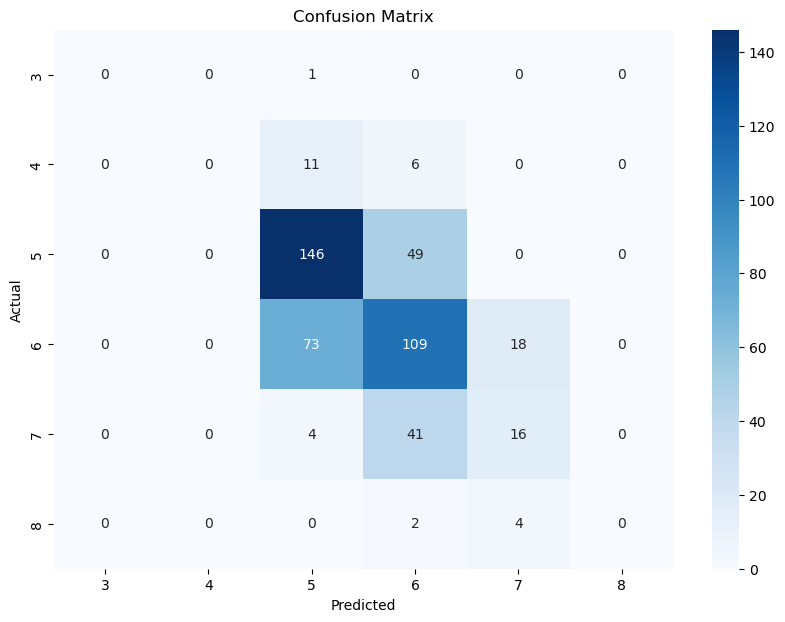

In [68]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Justificación:**

*Entrenamiento:* model.fit() ajusta el modelo a los datos de entrenamiento. La configuración de max_iter=1000 asegura que el algoritmo tenga suficiente tiempo para encontrar una solución óptima.

*Predicciones:* model.predict() se usa para hacer predicciones sobre el conjunto de prueba.

*Evaluación:*

*Precisión (Accuracy):* Proporción de predicciones correctas.

*Matriz de Confusión:* Proporciona una visión detallada de los aciertos y errores de clasificación.

*Reporte de Clasificación:* Ofrece métricas detalladas para evaluar el rendimiento del modelo en cada clase.

**5 Optimización del Modelo con Grid Search**

**Justificación:**

*Grid Search:* Permite encontrar la mejor combinación de hiperparámetros para el modelo. La búsqueda en cuadrícula (GridSearchCV) evalúa múltiples configuraciones de parámetros usando validación cruzada para elegir la mejor.

*Optimización:* Ajustar los hiperparámetros ayuda a mejorar el rendimiento del modelo y evitar el sobreajuste. Se busca la configuración que maximiza la precisión del modelo en el conjunto de prueba.

In [116]:
# Definir el rango de hiperparámetros para Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parámetro de regularización
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']  # Algoritmo de optimización
}

In [117]:
# Inicializar el modelo de Regresión Logística
model = LogisticRegression(max_iter=1000)

In [118]:
# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

In [119]:
# Ajustar el Grid Search a los datos de entrenamiento
grid_search.fit(X_train_scaled, y_train)

/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/julio/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: Con

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [120]:
# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'C': 10, 'solver': 'saga'}


In [121]:
# Evaluar el modelo optimizado
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [122]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred,zero_division=0)

In [123]:
# Imprimir los resultados
print(f'Accuracy (Optimized): {accuracy:.2f}')

Accuracy (Optimized): 0.57


In [124]:
print('Confusion Matrix (Optimized):')
print(conf_matrix)

Confusion Matrix (Optimized):
[[  0   0   1   0   0   0]
 [  0   1  10   6   0   0]
 [  0   0 146  48   1   0]
 [  0   0  73 109  18   0]
 [  0   0   4  40  17   0]
 [  0   0   0   2   4   0]]


In [125]:
print('Classification Report (Optimized):')
print(class_report)

Classification Report (Optimized):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.06      0.11        17
           5       0.62      0.75      0.68       195
           6       0.53      0.55      0.54       200
           7       0.42      0.28      0.34        61
           8       0.00      0.00      0.00         6

    accuracy                           0.57       480
   macro avg       0.43      0.27      0.28       480
weighted avg       0.56      0.57      0.55       480



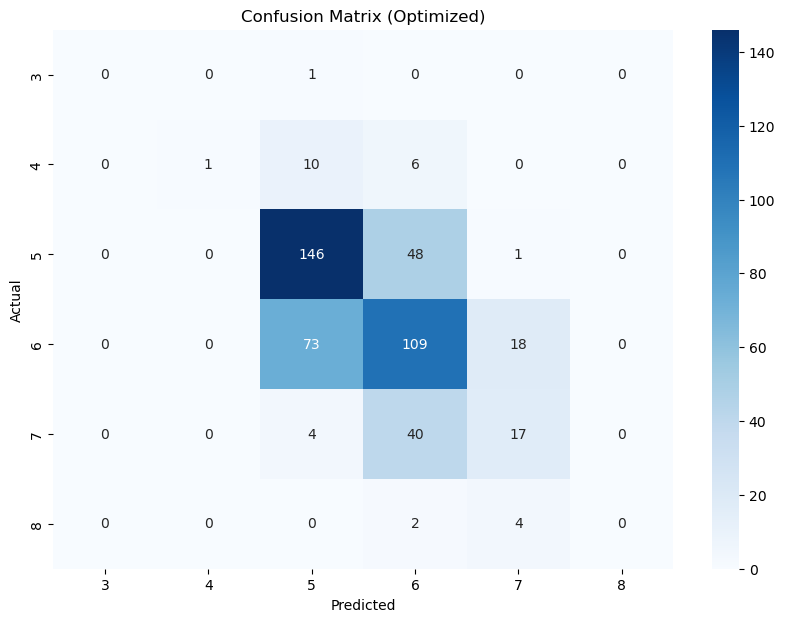

In [126]:
# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized)')
plt.show()

## Evaluación de Modelos de Regresión Logística

#### Métricas de Evaluación

**Accuracy (Exactitud)**
- **Definición**: Proporción de predicciones correctas sobre el total de predicciones realizadas.
- **Fórmula**: $\text{Accuracy} = \frac{\text{Número de predicciones correctas}}{\text{Número total de predicciones}}$
- **Interpretación**: Mide la capacidad general del modelo para hacer predicciones correctas.

**Confusion Matrix (Matriz de Confusión)**
- **Definición**: Tabla que muestra las predicciones del modelo en comparación con los valores reales.
- **Interpretación**: Ayuda a identificar los errores de clasificación específicos.

**Classification Report (Informe de Clasificación)**
- **Precision (Precisión)**: Proporción de verdaderos positivos sobre el total de positivos predichos.
  - **Fórmula**: $\text{Precision} = \frac{TP}{TP + FP}$
  - **Interpretación**: Indica la calidad de las predicciones positivas.
- **Recall (Exhaustividad)**: Proporción de verdaderos positivos sobre el total de positivos reales.
  - **Fórmula**: $ \text{Recall} = \frac{TP}{TP + FN} $
  - **Interpretación**: Mide la capacidad del modelo para encontrar todos los ejemplos positivos.
- **F1-Score**: Media armónica entre precisión y recall.
  - **Fórmula**: $ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $
  - **Interpretación**: Proporciona una métrica balanceada entre precisión y recall.

**Macro Average**
- **Definición**: Promedia las métricas de cada clase sin tener en cuenta el soporte de cada clase.
- **Interpretación**: Da una idea general del rendimiento del modelo en todas las clases.

**Weighted Average**
- **Definición**: Promedia las métricas de cada clase ponderadas por el número de verdaderos ejemplos en cada clase.
- **Interpretación**: Refleja el desempeño del modelo teniendo en cuenta el desequilibrio de clases.

**Resultados del Modelo Sin Optimización**

- **Accuracy**: 56.46%
- **Precision**: Varía significativamente entre clases, con bajos valores para clases menos representadas.
- **Recall**: Similar a la precisión, con bajos valores para algunas clases.
- **F1-Score**: Generalmente bajo para las clases menos representadas.

**Resumen**:
- El modelo sin optimización muestra un rendimiento general del 56.46%.
- Las métricas de precisión y recall son desiguales, especialmente en las clases menos representadas, lo que indica un desafío en la capacidad del modelo para predecir adecuadamente todas las clases.

**Resultados del Modelo con Grid Search**

- **Accuracy**: 57.00%
- **Precision**: Mejora en algunas clases, especialmente en la clase 4.
- **Recall**: Mejora marginal en algunas clases, aunque sigue siendo bajo para otras.
- **F1-Score**: Mejorado ligeramente en algunas clases, pero sigue siendo desigual.

**Resumen**:
- El modelo optimizado con Grid Search muestra una ligera mejora en la precisión general, alcanzando un 57.00%.
- La optimización ha proporcionado mejoras marginales en la precisión y recall para algunas clases específicas, aunque el rendimiento sigue siendo desigual para otras clases.

#### **Comparación y Conclusiones**

- **Accuracy**: La precisión general ha mejorado ligeramente con Grid Search, pasando del 56.46% al 57.00%.
- **Precisión y Recall**: El modelo optimizado muestra una mejora en la precisión de algunas clases, especialmente en la clase 4, y en la capacidad de recall en algunas clases. Sin embargo, el rendimiento sigue siendo desigual en otras clases.
- **F1-Score**: El F1-Score ha mejorado ligeramente en algunas clases, reflejando una mejora en el balance entre precisión y recall, aunque sigue siendo bajo en las clases menos representadas.

**Conclusión**:
- La aplicación de Grid Search ha proporcionado una mejora marginal en el rendimiento del modelo, con un aumento en la precisión general y mejoras en algunas métricas específicas.
- A pesar de estas mejoras, el modelo sigue enfrentando desafíos en la predicción de clases menos representadas. Se recomienda explorar más técnicas de balanceo de clases o ajustar las características del modelo para lograr un mejor rendimiento general.
